In [9]:
import sys
sys.path.append('../')

import numpy as np

from helper import *

In [10]:
from tqdm import tqdm

def research_minibatch_calculation(n_tests=1):
    results = []

    real_weight, real_bias = 2, 0

    dots_count = 500
    variance = 0.5
    X = np.random.rand(dots_count, 1)
    y = real_weight * X + real_bias + (np.random.rand(dots_count, 1) * variance - variance / 2)
    loss_real = minibatch_library(X, y).get_loss_history([[real_weight]])[-1]

    for i in tqdm(range(1, X.shape[0] + 1)):
        count_sum = 0
        for j in range(n_tests):
            sgd = minibatch_library(X, y, batch_size=i)
            loss_real = sgd.get_loss_history([[real_weight]])[-1]
            result = sgd.gradient_descent(np.array([0], float), max_epochs=10000, initial_lr=0.001, eps=loss_real+(loss_real), apply_min=True, apply_value=True)
            count_sum += len(result)
        results.append(count_sum / n_tests)
    
    return results

In [11]:
def research_minibatch_view(results, start=None, end=None):
    if start is None:
        start = 1
    if end is None:
        end = len(results)

    # График n_epochs
    plt.plot(range(start, end+1), results[start-1:end], marker='o', linewidth=3, markersize=3, label='Minibatch GD')
    plt.xlabel('Batch size')
    plt.ylabel('n epochs')
    plt.legend()

    plt.show()

In [12]:
results = research_minibatch_calculation(n_tests=10)

100%|██████████| 500/500 [00:40<00:00, 12.22it/s]


In [13]:
print(results)

[3089.2, 1224.5, 767.4, 557.5, 442.4, 364.1, 311.8, 270.9, 241.4, 213.2, 194.3, 178.8, 165.4, 153.2, 139.9, 133.2, 126.3, 118.5, 112.7, 106.7, 100.9, 97.4, 93.3, 88.6, 84.9, 82.2, 78.7, 75.1, 73.7, 71.9, 69.2, 66.7, 64.5, 62.5, 60.2, 59.5, 57.5, 56.6, 54.6, 53.4, 51.6, 51.1, 49.8, 48.5, 47.4, 46.4, 45.9, 44.2, 43.9, 43.0, 41.8, 41.4, 40.4, 39.8, 39.1, 38.3, 37.6, 37.2, 36.5, 36.0, 35.2, 34.8, 34.5, 33.3, 33.5, 32.6, 32.2, 32.1, 31.4, 31.0, 30.6, 29.9, 29.6, 29.0, 29.0, 28.6, 27.8, 28.0, 27.5, 27.1, 26.8, 26.6, 26.0, 25.8, 25.6, 25.2, 25.0, 24.7, 24.4, 24.2, 23.8, 23.5, 23.5, 23.3, 23.0, 22.8, 22.9, 22.4, 22.1, 21.9, 21.9, 21.6, 21.5, 21.0, 20.9, 20.9, 20.4, 20.2, 20.2, 19.9, 19.8, 19.4, 19.3, 19.1, 19.1, 18.9, 18.8, 18.7, 18.5, 18.3, 18.0, 18.0, 18.0, 17.8, 17.6, 17.6, 17.3, 17.3, 17.1, 17.2, 17.1, 16.7, 16.8, 16.4, 16.3, 16.3, 16.0, 16.0, 16.0, 15.9, 16.0, 15.8, 15.6, 15.6, 15.1, 15.1, 15.1, 15.0, 15.1, 15.0, 14.9, 14.9, 14.6, 14.4, 14.6, 14.2, 14.3, 14.1, 14.0, 14.0, 14.0, 14.0, 13.9

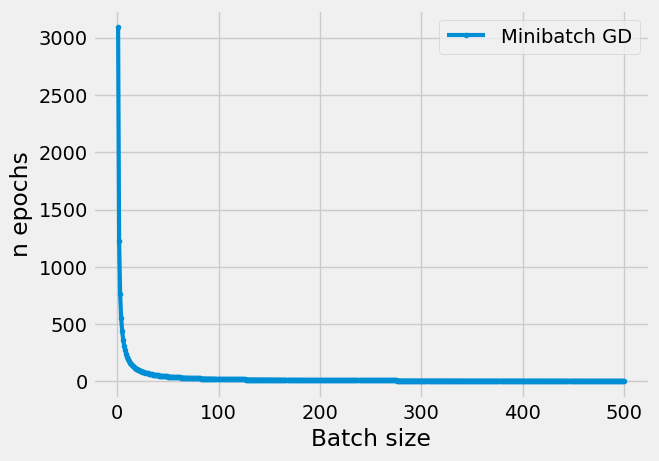

In [14]:
research_minibatch_view(results)

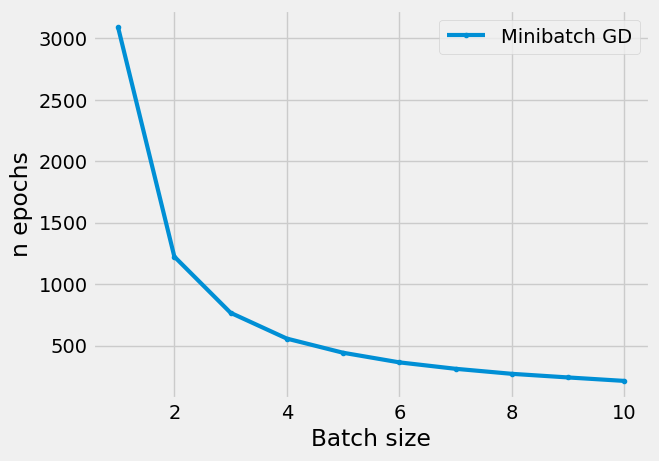

In [15]:
research_minibatch_view(results, 1, 10)

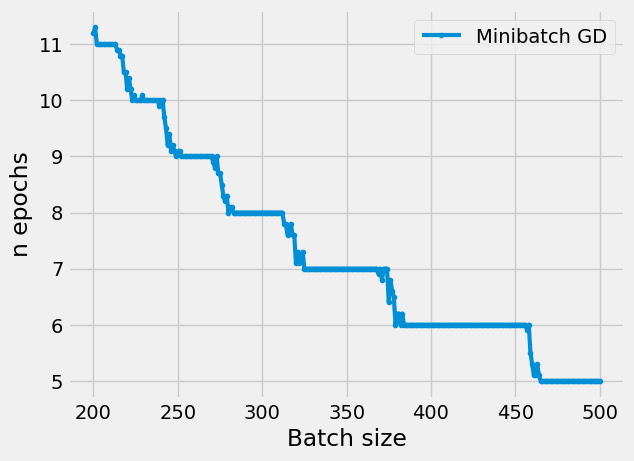

In [16]:
research_minibatch_view(results, 200, 500)